<a href="https://colab.research.google.com/github/alanfmorato/statistical-study/blob/main/Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
df = pd.read_excel("/content/análise.xlsx")

In [55]:
df.columns

Index(['Amostra', 'Máquina', 'Operador', 'Largura'], dtype='object')

In [56]:
df.head()

,Amostra,Máquina,Operador,Largura
0,1,Sulzer,Julio,83.7
1,1,Sulzer,Julio,83.4
2,1,Sulzer,Julio,84.2
3,1,Sulzer,Julio,83.9
4,1,Sulzer,Julio,82.7


###Variáveis Qualitativas

In [57]:
#Nominal
sorted(df['Máquina'].unique())

['Nova', 'Sulzer']

In [58]:
#Nominal
sorted(df['Operador'].unique())

['Gerardo', 'Julio', 'Luis']

###Variáveis Quantitativas

In [59]:
#Contínua
sorted(df['Amostra'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
#Discreta
sorted(df['Largura'].unique())

###Frequência

In [61]:
#Calculando a frequência de teste das máquinas
freq_maq = df['Máquina'].value_counts()
freq_maq

Sulzer    45
Nova      45
Name: Máquina, dtype: int64

In [62]:
#Calculando o percentual de teste das máquinas
perc_maq = df['Máquina'].value_counts(normalize = True)*100
perc_maq

Sulzer    50.0
Nova      50.0
Name: Máquina, dtype: float64

In [63]:
#Guardando informações em tabelas
tabela_maquina = pd.DataFrame({'Frequencia': freq_maq, 'Porcentagem': perc_maq})
tabela_maquina

,Frequencia,Porcentagem
Sulzer,45,50.0
Nova,45,50.0


In [64]:
#Calculando a frequência de teste das operador
freq_op = df['Operador'].value_counts()
freq_op

Julio      30
Gerardo    30
Luis       30
Name: Operador, dtype: int64

In [69]:
#Calculando o percentual de teste das operador
perc_op = df['Operador'].value_counts(normalize = True)*100
perc_op = perc_op.round(2)
perc_op

Julio      33.33
Gerardo    33.33
Luis       33.33
Name: Operador, dtype: float64

In [70]:
#Guardando informações em tabelas
tabela_operador = pd.DataFrame({'Frequencia': freq_op, 'Porcentagem': perc_op})
tabela_operador

,Frequencia,Porcentagem
Julio,30,33.33
Gerardo,30,33.33
Luis,30,33.33


In [71]:
#Calculando a frequência de teste das Amostras
freq_am = df['Amostra'].value_counts()
freq_am

1     5
2     5
17    5
16    5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
18    5
Name: Amostra, dtype: int64

In [75]:
#Calculando o percentual de teste das operador
perc_am = df['Amostra'].value_counts(normalize = True)*100
perc_am = perc_am.round(2)
perc_am

1     5.56
2     5.56
17    5.56
16    5.56
15    5.56
14    5.56
13    5.56
12    5.56
11    5.56
10    5.56
9     5.56
8     5.56
7     5.56
6     5.56
5     5.56
4     5.56
3     5.56
18    5.56
Name: Amostra, dtype: float64

In [80]:
#Guardando informações em tabelas
tabela_amostra = pd.DataFrame({'Frequencia': freq_am, 'Porcentagem': perc_am})
tabela_amostra

,Frequencia,Porcentagem
1,5,5.56
2,5,5.56
17,5,5.56
16,5,5.56
15,5,5.56
14,5,5.56
13,5,5.56
12,5,5.56
11,5,5.56
10,5,5.56


In [87]:
tabela_amostra.rename_axis('Amostra', axis = 'columns', inplace=True)
tabela_amostra

Amostra,Frequencia,Porcentagem
1,5,5.56
2,5,5.56
17,5,5.56
16,5,5.56
15,5,5.56
14,5,5.56
13,5,5.56
12,5,5.56
11,5,5.56
10,5,5.56


### Ponto Médio

In [93]:
df.head()

,Amostra,Máquina,Operador,Largura
0,1,Sulzer,Julio,83.7
1,1,Sulzer,Julio,83.4
2,1,Sulzer,Julio,84.2
3,1,Sulzer,Julio,83.9
4,1,Sulzer,Julio,82.7


In [103]:
#Limite Inferior - Máquina
LIM = df['Largura'].min()
LIM

82.6

In [102]:
#Limite Superior - Máquina
LSM = df['Largura'].max()
LSM

89.5

In [99]:
#Ponto Médio - Máquina
PM = (LSM - LIM)/2
PM

3.450000000000003

In [100]:
#Amplitude
Amaq = LSM - LIM
Amaq

6.900000000000006

###Calculando o número de classes

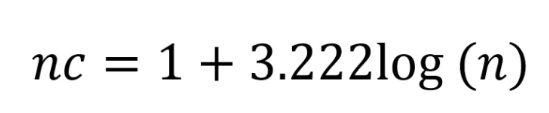

In [104]:
#Fórmula de Sturges
n = df.shape[0]
n = 1 + (10/3) * np.log10(n)
n = int(n.round(0))
n

8

In [106]:
frequencia = pd.value_counts(pd.cut(x = df.Largura, bins = n, include_lowest= True), sort = False)
frequencia

(82.592, 83.462]     6
(83.462, 84.325]     9
(84.325, 85.188]     8
(85.188, 86.05]     23
(86.05, 86.912]     20
(86.912, 87.775]     6
(87.775, 88.638]    12
(88.638, 89.5]       6
Name: Largura, dtype: int64

In [108]:
percentual = pd.value_counts(pd.cut(x = df.Largura, bins = n, include_lowest= True), sort = False, normalize = True)*100
percentual

(82.592, 83.462]     6.666667
(83.462, 84.325]    10.000000
(84.325, 85.188]     8.888889
(85.188, 86.05]     25.555556
(86.05, 86.912]     22.222222
(86.912, 87.775]     6.666667
(87.775, 88.638]    13.333333
(88.638, 89.5]       6.666667
Name: Largura, dtype: float64

<ipython-input-111-8acb1e5df7ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Largura, bins = 8 ,kde = True);


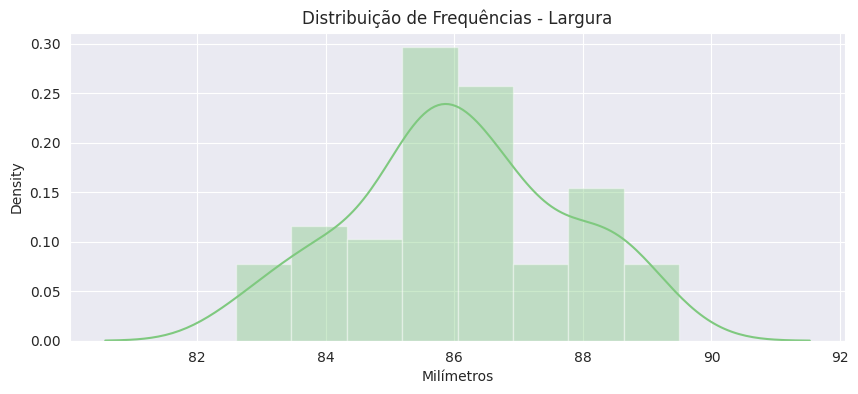

In [111]:
ax = sns.distplot(df.Largura, bins = 8 ,kde = True);
ax.figure.set_size_inches(10,4)
ax.set_title("Distribuição de Frequências - Largura")
ax.set_xlabel("Milímetros")
ax;